In [1]:
import sys
#pip install biopython
#pip install dna-features-viewer
#pip install shap
#pip install seaborn

sys.path.append('../../bitome2/')
sys.path.append('../')
from bitome.core import Bitome
from feature_functions import *

## FASTA

In [2]:
bitome_fasta = Bitome('NC_000964.3_2.fasta')
print(f'Sequence 1st 50: {bitome_fasta.sequence[:50]}')
print(f'Description: {bitome_fasta.description}')
print(f'Sequence ID: {bitome_fasta.reference_id}')

Sequence 1st 50: ATCTTTTTCGGCTTTTTTTAGTATCCACAGAGGTTATCGACAACATTTTC
Description: NC_000964.3 Bacillus subtilis subsp. subtilis str. 168 complete genome
Sequence ID: NC_000964.3


## GenBank

In [3]:
bitome_genbank = Bitome('NC_000964.3_2.gb')
bitome_genbank.gene_table.head()

,left,right,strand,pseudo,name
locus_tag,,,,,
BSU_00010,4213857,4215197,-1,False,dnaA
BSU_00020,4212532,4213668,-1,False,dnaN
BSU_00030,4212186,4212401,-1,False,rlbA
BSU_00040,4211058,4212170,-1,False,recF
BSU_00050,4210795,4211040,-1,False,remB


In [4]:
bitome_genbank.protein_table.head()

,left,right,strand,name
locus_tag,,,,
BSU_00010,4213857,4215197,-1,chromosomal replication initiator informationa...
BSU_00020,4212532,4213668,-1,DNA polymerase III (beta subunit)
BSU_00030,4212186,4212401,-1,RNA binding protein involved in ribosome matur...
BSU_00040,4211058,4212170,-1,"RecA filament-DNA complex stabilisation, ssDNA..."
BSU_00050,4210795,4211040,-1,regulator of extracellular matrix formation


In [5]:
bitome_genbank.misc_feature_table.head()

,left,right,strand,type
locus_tag,,,,
BSU_rRNA_1,4204243,4205797,-1,rRNA
BSU_tRNA_5,4204067,4204143,-1,tRNA
BSU_tRNA_6,4203980,4204055,-1,tRNA
BSU_rRNA_2,4200971,4203898,-1,rRNA
BSU_rRNA_3,4200797,4200915,-1,rRNA


In [6]:
bitome_genbank_no_auto = Bitome('NC_000964.3_2.gb', use_genbank=False)
bitome_genbank_no_auto.gene_table.head()

,left,right,strand
locus_tag,,,


## Feature Tables

In [8]:
bitome_fasta_tables = Bitome('NC_000964.3_2.fasta',
    gene_table='gene_table_good_bs.csv',
    protein_table='protein_table_good_bs.csv',
)
bitome_fasta_tables.gene_table.head()

,name,left,right,strand
locus_tag,,,,
new_24_297_c,S2,24,297,-1
new_299_1067_c,S4,299,1067,-1
BSU_00010,dnaA,410,1750,1
BSU_00030,yaaA,3206,3421,1
BSU_00050,remB,4567,4812,1


In [10]:
bitome_many_tables = Bitome('NC_000964.3_2.fasta',
    gene_table='gene_table_good_bs.csv',
    protein_table='protein_table_good_bs.csv',
    tu_table='tu_bs.csv',
    tss_table='tss_bs.csv',
    riboswitch_table='riboswitch_bs.csv',
)
bitome_many_tables.tu_table.head()

,name,left,right,strand,tss,sigma_factor,box10_left,box10_right,box35_left,box35_right
locus_tag,,,,,,,,,,
new_24_297_c,S2,24,297,reverse,297,K,278,296,254,272
new_299_1067_c,S4,299,1067,reverse,1066,"E, F",1046,1064,1021,1039
BSU_00010,dnaA,410,1750,forward,157,A,137,155,113,131
BSU_00030,yaaA,3206,3421,forward,3180,A,3160,3178,3136,3154
BSU_00050,remB,4567,4812,forward,3650,A,3632,3650,3605,3623


In [11]:
bitome_many_tables.tu_table.head()

,name,left,right,strand,tss,sigma_factor,box10_left,box10_right,box35_left,box35_right
locus_tag,,,,,,,,,,
new_24_297_c,S2,24,297,reverse,297,K,278,296,254,272
new_299_1067_c,S4,299,1067,reverse,1066,"E, F",1046,1064,1021,1039
BSU_00010,dnaA,410,1750,forward,157,A,137,155,113,131
BSU_00030,yaaA,3206,3421,forward,3180,A,3160,3178,3136,3154
BSU_00050,remB,4567,4812,forward,3650,A,3632,3650,3605,3623


In [12]:
bitome_many_tables._all_tables

{'gene':                       name     left    right  strand
 locus_tag                                           
 new_24_297_c            S2       24      297      -1
 new_299_1067_c          S4      299     1067      -1
 BSU_00010             dnaA      410     1750       1
 BSU_00030             yaaA     3206     3421       1
 BSU_00050             remB     4567     4812       1
 ...                    ...      ...      ...     ...
 new_4213186_4215471  S1579  4213186  4215471       1
 BSU_41030              jag  4213200  4213826      -1
 BSU_41040            yidC1  4213823  4214608      -1
 BSU_41050             rnpA  4214753  4215103      -1
 new_4215473_4215670  S1583  4215473  4215670       1
 
 [2597 rows x 4 columns],
 'protein':               left    right  strand  \
 locus_tag                             
 BSU_27090  2766558  2767946       1   
 BSU_14120  1485118  1485315       1   
 BSU_28510  2913661  2915148      -1   
 BSU_28720  2938330  2939832      -1   
 BSU_14480 

## Get Sequence

In [13]:
bitome_genbank.get_feature_sequence(bitome_genbank.gene_table.loc['BSU_41030'])

Seq('GTGAGGAATGTGACTGCTGCAGGGCGAAATGTCGATGAAGCAGTACAGTCCGGA...TAG')

In [14]:
bitome_genbank.get_sequence(100, 200, -1)

Seq('AGGAATAGCTGTTAAAGACAGTCTTACTTATTATATTTGCGTTACCTATTCATT...ACC')

##  Inter-Feature Distance

In [15]:
bitome_genbank.inter_feature_distance(
    bitome_genbank.gene_table.loc['BSU_41030'], bitome_genbank.gene_table.loc['BSU_41050']
)

1277

## Features in Region

In [16]:
bitome_genbank.features_in_range(1, 10000)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,left,right,strand,pseudo,name,type
locus_tag,,,,,,
BSU_40960,9203,10051,1,False,parB,gene
BSU_40970,8449,9210,1,False,parA,gene
BSU_40980,7761,8201,-1,False,yyaB,gene
BSU_40990,6859,7710,1,False,nocA,gene
BSU_41000,6018,6737,1,False,rsmG,gene
BSU_41010,4118,6004,1,False,trmF,gene
BSU_41020,2718,4097,1,False,mnmE,gene
BSU_41030,1781,2407,1,False,jag,gene
BSU_41040,999,1784,1,False,oxaAA,gene


## Genome Browser

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


<AxesSubplot: >

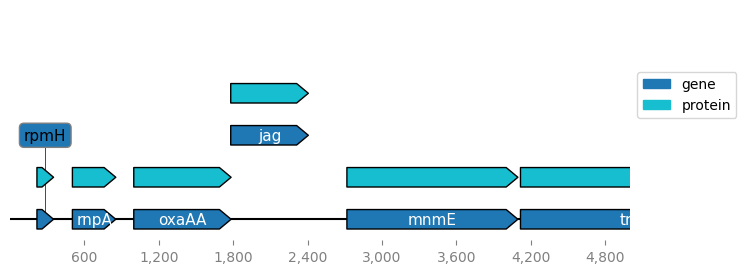

In [17]:
bitome_genbank.view_region(1, 5000)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


<AxesSubplot: >

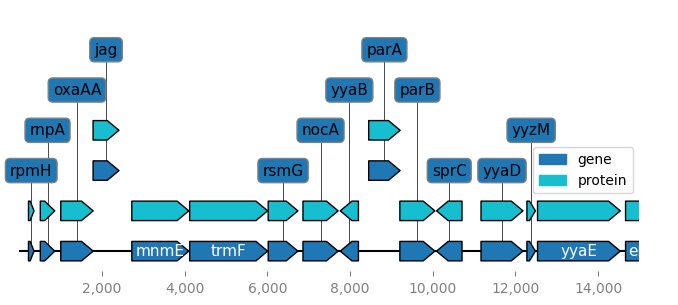

In [18]:
bitome_genbank.view_region(1, 15000)

## General Motif Matching

In [19]:
tf_pwm_db = rpwm('motif_pwm_db.txt')
argp_pwm_old = tf_pwm_db['ArgP']
argp_pssm = {base: [pos_dict[base] for pos_dict in argp_pwm_old] for base in 'ATCG'}
print(argp_pssm)

{'A': [1.0, -0.9, -0.3, -0.6, -0.6, -0.9, -0.3, -0.9, 0.2, -0.3, 0.9, -0.3, -0.9, -0.3, -0.6, -3.0, 0.5, 0.7, -0.6], 'T': [-0.6, 0.8, 0.9, 0.7, 0.5, -0.1, 0.5, 0.2, 0.7, -0.1, -1.5, 0.8, 0.1, -0.3, 0.1, 0.5, -1.5, -3.0, 0.7], 'C': [-1.2, -1.2, -3.0, -0.3, -1.2, 0.8, -0.6, -1.2, -3.0, 0.6, -0.6, -3.0, -1.2, 0.0, 0.2, -0.3, 0.7, 0.2, -0.3], 'G': [-3.0, -0.2, -3.0, -1.2, 0.2, -0.2, -0.2, 0.8, -3.0, -0.2, -0.6, -0.6, 0.9, 0.6, 0.2, 0.4, -1.2, -0.2, -1.2]}


In [20]:
bitome_genbank.featurize_promoter(728431, 1, minus_10_motif=argp_pssm, minus_35_motif=argp_pssm)

[-7.2, 728412, 728430, -4.6, 728388, 728406]


{'m10_sequence': 'ACCGCAATTCCTTCACGCC',
 'm10_score': -7.2,
 'box10_left': 728412,
 'box10_right': 728430,
 'm10_location': -10.0,
 'm35_sequence': 'ATACGGTTCCCGCTTTGGA',
 'm35_score': -4.6,
 'box35_left': 728388,
 'box35_right': 728406,
 'm35_location': -34.0,
 'spacer_sequence': Seq('AGCTGTA'),
 'spacer_length': 7,
 'spacer_at': 0.5714285714285714,
 'usr_at': 0.2857142857142857,
 'dsr_ag': 0.5}

In [21]:
bitome_genbank.featurize_promoter(1066, 1, minus_10_motif=argp_pssm, minus_35_motif=argp_pssm)

[0.4, 1046, 1064, -4.440892e-16, 1021, 1039]


{'m10_sequence': 'ATTCATGCTTTTGGCTGGA',
 'm10_score': 0.4,
 'box10_left': 1046,
 'box10_right': 1064,
 'm10_location': -11.0,
 'm35_sequence': 'GGTTGCTATTAAGTATGGT',
 'm35_score': -4.440892e-16,
 'box35_left': 1021,
 'box35_right': 1039,
 'm35_location': -36.0,
 'spacer_sequence': Seq('TTGGCGTA'),
 'spacer_length': 8,
 'spacer_at': 0.5,
 'usr_at': 0.6190476190476191,
 'dsr_ag': 0.75}

In [22]:
bitome_genbank.motif_search(28000, 29000, +1, argp_pssm, n_best_matches=5)

,match_sequence,log_odds,left,right
0,ATATACTATAATGCTTAAT,7.5,28260,28278
1,ATATGGCTTGATTATCAAT,5.5,28699,28717
2,AAAATTTGATATTGATAAT,5.2,28327,28345
3,TATTGGGTTTATTGTTAGT,4.7,28167,28185
4,GTTTTAAGTTATTTGTCAT,4.4,28981,28999


## Motif Matching near TSS

In [23]:
bitome_genbank.promoter_motif_search(28288, 1, argp_pssm, n_best_matches=5)

,match_sequence,log_odds,left,right
0,ATATACTATAATGCTTAAT,7.5,28260,28278
1,AGACATCGTCCTTTTCAAT,2.7,28293,28311
2,CTTTTCAATCCTCTTTTAT,1.8,28303,28321
3,TCTTTCGTTTTTTTATAAA,1.3,28202,28220
4,ATTACTTAAAAGAGGGAGA,0.6,28236,28254


###### Changes to be made: Use the right motif for bacillus and corresponding change usr values

In [24]:
bitome_genbank.featurize_promoter(28288, 1, minus_10_motif=argp_pssm, minus_35_motif=argp_pssm,
                                 usr=(-65, -45))

[0.5, 28269, 28287, -7.1, 28243, 28261]


{'m10_sequence': 'AATGCTTAATGATGTTAAT',
 'm10_score': 0.5,
 'box10_left': 28269,
 'box10_right': 28287,
 'm10_location': -10.0,
 'm35_sequence': 'AAAAGAGGGAGAAGAAAAT',
 'm35_score': -7.1,
 'box35_left': 28243,
 'box35_right': 28261,
 'm35_location': -36.0,
 'spacer_sequence': Seq('TATACTATA'),
 'spacer_length': 9,
 'spacer_at': 0.8888888888888888,
 'usr_at': 0.6666666666666666,
 'dsr_ag': 0.16666666666666666}

In [25]:
from bitome.util import create_motif

In [26]:
create_motif(['ATCG', 'ATCC', 'ATCT']).pwm

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


{'A': (1.0, 0.0, 0.0, 0.0),
 'C': (0.0, 0.0, 1.0, 0.3333333333333333),
 'G': (0.0, 0.0, 0.0, 0.3333333333333333),
 'T': (0.0, 1.0, 0.0, 0.3333333333333333)}